# Applied Data Visaulization Lecture 4: Pandas



## Series Recap

In [1]:
import pandas as pd

Series are the most fundamental data structure in pandas. Let's create two simple series based on an arrays:

In [2]:

bands = pd.Series(["Stones", "Beatles", "Zeppelin", "Pink Floyd"])
bands

0        Stones
1       Beatles
2      Zeppelin
3    Pink Floyd
dtype: object

In [3]:
founded = pd.Series([1962, 1960, 1968, 1965])
founded

0    1962
1    1960
2    1968
3    1965
dtype: int64

In [4]:
# the data is the first parameter, the index is given by the index keyword
bands_founded = pd.Series([1962, 1960, 1968, 1965, 2012],
                          index=["Stones", "Beatles", "Zeppelin", "Pink Floyd", "Pink Floyd"], 
                          name="Bands founded")
bands_founded

Stones        1962
Beatles       1960
Zeppelin      1968
Pink Floyd    1965
Pink Floyd    2012
Name: Bands founded, dtype: int64

Indexing and slicing works largely like in normal python, but instead of just directly using the bracket notations, it is recommended to use `iloc` for indexing by position and `loc` for indexing by labelled indices. 

In [5]:
# slicing by position
bands_founded.iloc[1:3]

Beatles     1960
Zeppelin    1968
Name: Bands founded, dtype: int64

When slicing by labelled index, the last value specified is *included*, which differs from regular Python slicing behavior.

In [6]:
# slicing by index
bands_founded.loc["Zeppelin" : "Pink Floyd"]

Zeppelin      1968
Pink Floyd    1965
Pink Floyd    2012
Name: Bands founded, dtype: int64

In [7]:
# Note that index 17 is included
bands.loc[1:17]

1       Beatles
2      Zeppelin
3    Pink Floyd
dtype: object

For series (not for data frames), `loc` and just using bracket notation is identical: 

In [8]:
bands[2:17]

2      Zeppelin
3    Pink Floyd
dtype: object

Both, `iloc` and `loc` can be used with arrays, which isn't possible in vanilla Python:

In [9]:
bands_founded.iloc[[0,3]]

Stones        1962
Pink Floyd    1965
Name: Bands founded, dtype: int64

In [10]:
bands_founded.loc[["Beatles", "Pink Floyd"]]

Beatles       1960
Pink Floyd    1965
Pink Floyd    2012
Name: Bands founded, dtype: int64

And, all these variants can also be used with boolean arrays, which we will soon find out to be very helpful:

In [11]:
bands_founded

Stones        1962
Beatles       1960
Zeppelin      1968
Pink Floyd    1965
Pink Floyd    2012
Name: Bands founded, dtype: int64

In [12]:
bands_founded.loc[[True, False, False, True, True]]

Stones        1962
Pink Floyd    1965
Pink Floyd    2012
Name: Bands founded, dtype: int64

### Masking and Filtering

With pandas we can create boolean arrays that we can use to mask and filter a dataset. In the following expression, we'll create a new array that has "True" for every band formed after 1964:

In [13]:
mask = bands_founded > 1964
mask

Stones        False
Beatles       False
Zeppelin       True
Pink Floyd     True
Pink Floyd     True
Name: Bands founded, dtype: bool

This uses a technique called **broadcasting**. We can use broadcasting with various operations:

In [14]:
# Not particularly useful for this dataset..
founding_months = bands_founded * 12
founding_months

Stones        23544
Beatles       23520
Zeppelin      23616
Pink Floyd    23580
Pink Floyd    24144
Name: Bands founded, dtype: int64

We can use a boolean mask to filter a series, as we've seen before:

In [15]:
# applying the mask to the original array
# note that almost all of those operations return a new copy and don't modify in place
bands_founded[mask]

Zeppelin      1968
Pink Floyd    1965
Pink Floyd    2012
Name: Bands founded, dtype: int64

The short form here would be:

In [16]:
bands_founded[bands_founded > 1967]

Zeppelin      1968
Pink Floyd    2012
Name: Bands founded, dtype: int64

## Exploring a Series

There are various way we can explore a series. We can count the number of non-null values: 

In [17]:
numbers = pd.Series([1962, 1960, 1968, 1965, 2012, None, 2016])
numbers.count()

6

We can also get an overview of the statistical properties of a series: 

In [18]:
numbers.describe()

count       6.000000
mean     1980.500000
std        26.120873
min      1960.000000
25%      1962.750000
50%      1966.500000
75%      2001.000000
max      2016.000000
dtype: float64

Note that None/NaN values are ignored here. We can drop all NaN values if we desire:

In [19]:
numbers = numbers.dropna()
numbers

0    1962.0
1    1960.0
2    1968.0
3    1965.0
4    2012.0
6    2016.0
dtype: float64

This works also for non-numerical data. Of course, we get different measures:

In [20]:
bands.describe()

count          4
unique         4
top       Stones
freq           1
dtype: object

## Sorting 

We can sort a series:

In [21]:
sorted_numbers = numbers.sort_values(ascending=False)
sorted_numbers

6    2016.0
4    2012.0
2    1968.0
3    1965.0
0    1962.0
1    1960.0
dtype: float64

Note that the indices remain the same! We can **reset the indices**:

In [22]:
# If we don't specify drop to be true, the previous indices are preserved in a separte column
sorted_numbers = sorted_numbers.reset_index(drop=True)
sorted_numbers

0    2016.0
1    2012.0
2    1968.0
3    1965.0
4    1962.0
5    1960.0
dtype: float64

We can also sort by the index:

In [23]:
# mix up the indices first
new_sorted_numbers = numbers.sort_values()
print(new_sorted_numbers)
new_sorted_numbers.sort_index()

1    1960.0
0    1962.0
3    1965.0
2    1968.0
4    2012.0
6    2016.0
dtype: float64


0    1962.0
1    1960.0
2    1968.0
3    1965.0
4    2012.0
6    2016.0
dtype: float64

## Applying a Function

Often, we will want to apply a function to all values of a Series. We can do that with the [`map()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.map.html) function:

In [24]:
import datetime

# Convert an integer year into a date, assuming Jan 1 as day and month.
def to_date(year):
    return datetime.date(int(year), 1, 1)
    
new_sorted_numbers.map(to_date)

1    1960-01-01
0    1962-01-01
3    1965-01-01
2    1968-01-01
4    2012-01-01
6    2016-01-01
dtype: object

This is an incredibly powerful concept that you can use to modify series in sophisticated ways, similar to list comprehension. 

Another way to use the map function is to pass in a dictionary that is then applied to matching objects: 

In [25]:
new_sorted_numbers.map({1965:1945, 2012:1999, 1968:"What"})

1     NaN
0     NaN
3    1945
2    What
4    1999
6     NaN
dtype: object

# Data Frames

Before we look at dataframes, let's just load some data from a file.

In [26]:
hit_albums = pd.read_csv("hit_albums.csv")
hit_albums

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0
...,...,...,...,...,...,...
72,Tracy Chapman,Tracy Chapman,1988,Folk rock,20.0,NaN
73,Usher,Confessions,2004,R&B,20.0,NaN
74,Various artists,Flashdance: Original Soundtrack from the Motio...,1983,Soundtrack,20.0,NaN
75,Whitney Houston,Whitney,1987,"Pop, R&B",20.0,NaN


Pandas provides the insanely powerful ['read_csv()'](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.read_csv.html) method. Also see [the documentation](http://pandas.pydata.org/pandas-docs/stable/io.html) for more info on all I/O operations in pandas, including writing CSV files. 

You can pass a lot of arguments to the method, such as delimiters, quote-chars, etc., but for our case the default parameters just worked. 

We've also just created our first data frame! Let's look at data frames in detail next. 

A data frame is a column-oriented data structure where each column is a pandas series.

Here is a great [cheat sheet](https://pandas.pydata.org/Pandas_Cheat_Sheet.pdf) for pandas functions. 

We've already loaded a data frame from file, but for completeness sake, let's create one in code: 

In [27]:
bandInfo = pd.DataFrame({
        "Name":["Led Zeppelin", "The Beatles", "Rolling Stones", "Radiohead"],
        "No Members":[4, 4, 4, 5],
        "No Albums":[9, 12, 29 ,9]
    })
bandInfo

,Name,No Members,No Albums
0,Led Zeppelin,4,9
1,The Beatles,4,12
2,Rolling Stones,4,29
3,Radiohead,5,9


This dataframe was initialized with a dictonary of column headers as keys and column data as values.

Just as a series, a data frame has an index, which corresponds to the first column here. In this case the index was automatically generated, but as for the series, we could use explicit values for the index. 

We can access columns in a data frame, which returns a series:

In [28]:
bandInfo["Name"]

0      Led Zeppelin
1       The Beatles
2    Rolling Stones
3         Radiohead
Name: Name, dtype: object

In [29]:
type(bandInfo["Name"])

pandas.core.series.Series

And obviously, we can do all the things we've learned about to this column/series. 

The previous example used columns to create the data frame. We can also create a data frame from rows. This doesn't make a ton of sense in this example, but data could be available like this from your data source, like if you're parsing a CSV.

In [30]:
bandInfo2 = pd.DataFrame([
        {"Name":"Led Zeppelin", "No Albums":9, "No Members":4},
        {"Name":"The Beatles", "No Albums":12, "No Members":4},
        {"Name":"Rolling Stones", "No Albums":29, "No Members":4},
        {"Name":"Radiohead", "No Albums":9, "No Members":5},
    ])
bandInfo2

,Name,No Albums,No Members
0,Led Zeppelin,9,4
1,The Beatles,12,4
2,Rolling Stones,29,4
3,Radiohead,9,5


While a series has only one axis, a dataframe has two, one for the rows (the index or '0' axis), one for the columns (the column or '1' axis). We can check out these axes:

In [31]:
bandInfo.axes

[RangeIndex(start=0, stop=4, step=1),
 Index(['Name', 'No Members', 'No Albums'], dtype='object')]

## Exploring Data Frames

You might have noticed that data frames are rendered in nice HTML tables within Jupyter Notebooks. For small data frames, just showing all the data makes sense, but for larger datasets, like our `hit_albums` dataset, plotting 70+ rows can be annoying, and for datasets with hundreds or thousands of rows it can be prohibitive. By default, a data frame only prints a limited number of elements. Notice the `...` in row 5 of the output of `hit_albums` above – only the first 4 and last 4 are printed. 

When working with data, e.g., when transforming or loading a dataset, it is important to see the raw data, for example, to check if a transformation was done correctly. Often, however, it's sufficient to see a part of the data, e.g., the first couple of rows and/or the last couple of rows. We can do this with the `head()` and `tail()` function:

In [32]:
# head shows the first 5 rows of a datset
hit_albums.head()

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0


In [33]:
# we can specify how much to show
hit_albums.head(8)

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0
5,Eagles,Their Greatest Hits (1971–1975),1976,"Rock, soft rock, folk rock",32.2,42.0
6,Bee Gees / Various artists,Saturday Night Fever,1977,Disco,19.0,40.0
7,Fleetwood Mac,Rumours,1977,Soft rock,27.9,40.0


In [34]:
# tail shows the last five rows in a datasaet
hit_albums.tail()

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
72,Tracy Chapman,Tracy Chapman,1988,Folk rock,20.0,NaN
73,Usher,Confessions,2004,R&B,20.0,NaN
74,Various artists,Flashdance: Original Soundtrack from the Motio...,1983,Soundtrack,20.0,NaN
75,Whitney Houston,Whitney,1987,"Pop, R&B",20.0,NaN
76,Shakira,Laundry Service,2001,"Pop, Rock",20.0,NaN


We can check out the dimensions of the data frame:

In [35]:
hit_albums.shape

(77, 6)

Here we learn that our dataset has 77 rows and 6 columns.

We can also get more info about the dataset using the info method, which is especially helpful to see the data types of the columns:

In [36]:
hit_albums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 6 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Artist                      77 non-null     object 
 1   Album                       77 non-null     object 
 2   Released                    77 non-null     int64  
 3   Genre                       77 non-null     object 
 4   Certified sales (millions)  77 non-null     float64
 5   Claimed sales (millions)    31 non-null     float64
dtypes: float64(2), int64(1), object(3)
memory usage: 3.7+ KB


As for series, we can get a rough description of the numerical values of the dataset.

In [37]:
hit_albums.describe()

,Released,Certified sales (millions),Claimed sales (millions)
count,77.000000,77.000000,31.000000
mean,1988.662338,22.409091,35.354839
std,9.949359,4.521620,7.855140
min,1967.000000,13.100000,30.000000
25%,1983.000000,20.000000,30.000000
50%,1987.000000,20.600000,32.000000
75%,1996.000000,25.000000,39.500000
max,2015.000000,45.400000,65.000000


We don't see any descriptions of the columns of non-numerical type. We can, however, get a summary by directly accessing a column:

In [38]:
hit_albums["Artist"].describe()

count                  77
unique                 56
top       Michael Jackson
freq                    5
Name: Artist, dtype: object

Here we can see that Michael Jackson is the top artist in this list, with five albums. Are there other artists with multiple albums in the list? We can answer that question with the value_counts() method:

In [39]:
hit_albums["Artist"].value_counts()

Artist
Michael Jackson                      5
Madonna                              3
Shania Twain                         3
The Beatles                          3
Various artists                      3
Bon Jovi                             2
Pink Floyd                           2
Whitney Houston                      2
Backstreet Boys                      2
Eagles                               2
Britney Spears                       2
Celine Dion                          2
Mariah Carey                         2
Adele                                2
Eminem                               1
Oasis                                1
Cyndi Lauper                         1
Boston                               1
TLC                                  1
Ace of Base                          1
Avril Lavigne                        1
Green Day                            1
Eric Clapton                         1
Def Leppard                          1
George Michael                       1
Simon & Garfunkel 

We can look at whether the numerical columns in our data frame are correlated using the [`corr()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) method. By default, this calculates a Pearson correlation between the column, excluding NaN values. Not surprisingly, we see a rather strong correlation (0.81) between certified and claimed sales. 

In [40]:
hit_albums.corr(numeric_only=True)

,Released,Certified sales (millions),Claimed sales (millions)
Released,1.000000,-0.052109,-0.320593
Certified sales (millions),-0.052109,1.000000,0.810280
Claimed sales (millions),-0.320593,0.810280,1.000000


We can also transpose a dataframe:

In [41]:
hit_albums.T

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
Artist,Michael Jackson,AC/DC,Pink Floyd,Whitney Houston / Various artists,Meat Loaf,Eagles,Bee Gees / Various artists,Fleetwood Mac,Shania Twain,Led Zeppelin,...,Prince & the Revolution,Shania Twain,Shania Twain,Supertramp,Tina Turner,Tracy Chapman,Usher,Various artists,Whitney Houston,Shakira
Album,Thriller,Back in Black,The Dark Side of the Moon,The Bodyguard,Bat Out of Hell,Their Greatest Hits (1971–1975),Saturday Night Fever,Rumours,Come On Over,Led Zeppelin IV,...,Purple Rain,The Woman in Me,Up!,Breakfast in America,Private Dancer,Tracy Chapman,Confessions,Flashdance: Original Soundtrack from the Motio...,Whitney,Laundry Service
Released,1982,1980,1973,1992,1977,1976,1977,1977,1997,1971,...,1984,1995,2002,1979,1984,1988,2004,1983,1987,2001
Genre,"Pop, rock, R&B",Hard rock,Progressive rock,"Soundtrack/R&B, soul, pop","Hard rock, progressive rock","Rock, soft rock, folk rock",Disco,Soft rock,"Country, pop","Hard rock, heavy metal",...,"Pop, rock, R&B","Country, pop","Country, pop, world music","Progressive rock, art rock","Pop, rock, R&B",Folk rock,R&B,Soundtrack,"Pop, R&B","Pop, Rock"
Certified sales (millions),45.4,25.9,22.7,27.4,20.6,32.2,19.0,27.9,29.6,29.0,...,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0,20.0
Claimed sales (millions),65.0,50.0,45.0,44.0,43.0,42.0,40.0,40.0,39.0,37.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Slicing Data Frames

A common task is to create subsets of a dataframe. Check out the official [user guide for more info on this](https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html).  

Column access/slicing works by directly using brackets `[]` on the data frame. Row access/slicing works by using the `.loc[]` indexer. 

We can explicitly define the the **column(s)** we want by their lables:

In [42]:
# a single column
hit_albums["Artist"].head()

0                      Michael Jackson
1                                AC/DC
2                           Pink Floyd
3    Whitney Houston / Various artists
4                            Meat Loaf
Name: Artist, dtype: object

We can use an array of lables if we want multiple columns. 

In [43]:
# specifying multiple columns in an array
hit_albums = hit_albums[["Artist","Certified sales (millions)", "Claimed sales (millions)"]]
hit_albums.head()

,Artist,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,45.4,65.0
1,AC/DC,25.9,50.0
2,Pink Floyd,22.7,45.0
3,Whitney Houston / Various artists,27.4,44.0
4,Meat Loaf,20.6,43.0


Slicing of columns requires the `iloc` operator

This: 
```python
hit_albums["Artist":"Genre"]
```
Doesn't work.

One break with the convention that rows have to be accessed via `loc` or `iloc` is simple numerical slicing. The documentation claims that's for convenience, since this is so common: 

In [44]:
hit_albums[:3]

,Artist,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,45.4,65.0
1,AC/DC,25.9,50.0
2,Pink Floyd,22.7,45.0


Using these access methods we can also update the order of columns: 

In [45]:
hit_albums[["Certified sales (millions)", "Claimed sales (millions)", "Artist"]].head()

,Certified sales (millions),Claimed sales (millions),Artist
0,45.4,65.0,Michael Jackson
1,25.9,50.0,AC/DC
2,22.7,45.0,Pink Floyd
3,27.4,44.0,Whitney Houston / Various artists
4,20.6,43.0,Meat Loaf


We can set a column to be the index:

In [46]:
hit_albums_reindexed = hit_albums.set_index("Artist")
hit_albums_reindexed.head()

,Certified sales (millions),Claimed sales (millions)
Artist,,
Michael Jackson,45.4,65.0
AC/DC,25.9,50.0
Pink Floyd,22.7,45.0
Whitney Houston / Various artists,27.4,44.0
Meat Loaf,20.6,43.0


#### Slicing with `loc`

We can retrieve **rows** and columns using the `loc` indexer by name. Depending on whether the label is unique or not, we get either a series or a data frame. 

Generally, `loc` is preferred over direct access via brackets. 

The general syntax is

```
df.loc[rows, columnns]
```
Here rows, columns can be explicit labels, lists of labels, or slicing operators. 

Here's a simple example: 

In [47]:
hit_albums_reindexed.loc["Meat Loaf"]

Certified sales (millions)    20.6
Claimed sales (millions)      43.0
Name: Meat Loaf, dtype: float64

And an example with multiple keys that returns a data frame: 

In [48]:
hit_albums_reindexed.loc["Michael Jackson"]

,Certified sales (millions),Claimed sales (millions)
Artist,,
Michael Jackson,45.4,65.0
Michael Jackson,20.3,34.0
Michael Jackson,17.6,32.0
Michael Jackson,20.0,NaN
Michael Jackson,20.0,NaN


The second argument in the `loc` array can be used to access columns 

In [49]:
hit_albums_reindexed.loc["Michael Jackson", "Certified sales (millions)"]

Artist
Michael Jackson    45.4
Michael Jackson    20.3
Michael Jackson    17.6
Michael Jackson    20.0
Michael Jackson    20.0
Name: Certified sales (millions), dtype: float64

Here is an example with a list of row labels. 

In [50]:
hit_albums_reindexed.loc[["Michael Jackson", "Meat Loaf"], "Certified sales (millions)"]

Artist
Michael Jackson    45.4
Michael Jackson    20.3
Michael Jackson    17.6
Michael Jackson    20.0
Michael Jackson    20.0
Meat Loaf          20.6
Name: Certified sales (millions), dtype: float64

We can use slice operations. Remember, that slicing by label (`loc`) includes the last value, by index (`iloc`) does not. 


Note that this doesn't work if we use labels that have duplicates as indexers. 

In [51]:
hit_albums_reindexed.loc["Green Day":"Supertramp"]

# this wouldn't work
# hit_albums_reindexed.loc["Green Day":"Michael Jackson"]

,Certified sales (millions),Claimed sales (millions)
Artist,,
Green Day,20.0,NaN
Lionel Richie,20.0,NaN
Michael Jackson,20.0,NaN
Michael Jackson,20.0,NaN
Prince & the Revolution,20.0,NaN
Shania Twain,20.0,NaN
Shania Twain,20.0,NaN
Supertramp,20.0,NaN


This can also be combined with slicing columns: 

In [52]:
hit_albums_reindexed.loc["Green Day":"Supertramp", ["Certified sales (millions)"]]

,Certified sales (millions)
Artist,
Green Day,20.0
Lionel Richie,20.0
Michael Jackson,20.0
Michael Jackson,20.0
Prince & the Revolution,20.0
Shania Twain,20.0
Shania Twain,20.0
Supertramp,20.0


We can also slice columns with loc. Let's re-load the full dataset first:  

In [53]:
full_hit_albums = pd.read_csv("hit_albums.csv")
full_hit_albums.head()

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0


This creates a slice containing all rows and the columns from Artist to Released: 

In [54]:
full_hit_albums.loc[:,"Artist":"Released"]

,Artist,Album,Released
0,Michael Jackson,Thriller,1982
1,AC/DC,Back in Black,1980
2,Pink Floyd,The Dark Side of the Moon,1973
3,Whitney Houston / Various artists,The Bodyguard,1992
4,Meat Loaf,Bat Out of Hell,1977
...,...,...,...
72,Tracy Chapman,Tracy Chapman,1988
73,Usher,Confessions,2004
74,Various artists,Flashdance: Original Soundtrack from the Motio...,1983
75,Whitney Houston,Whitney,1987


Here's a slice for the first 10 rows and columns Artists to Released: 

In [55]:
full_hit_albums.loc[:10,"Artist":"Released"]

,Artist,Album,Released
0,Michael Jackson,Thriller,1982
1,AC/DC,Back in Black,1980
2,Pink Floyd,The Dark Side of the Moon,1973
3,Whitney Houston / Various artists,The Bodyguard,1992
4,Meat Loaf,Bat Out of Hell,1977
5,Eagles,Their Greatest Hits (1971–1975),1976
6,Bee Gees / Various artists,Saturday Night Fever,1977
7,Fleetwood Mac,Rumours,1977
8,Shania Twain,Come On Over,1997
9,Led Zeppelin,Led Zeppelin IV,1971


Here is the same thing using `iloc`, i.e., index based slicing:

In [56]:
full_hit_albums.iloc[0:10, 0:3]

,Artist,Album,Released
0,Michael Jackson,Thriller,1982
1,AC/DC,Back in Black,1980
2,Pink Floyd,The Dark Side of the Moon,1973
3,Whitney Houston / Various artists,The Bodyguard,1992
4,Meat Loaf,Bat Out of Hell,1977
5,Eagles,Their Greatest Hits (1971–1975),1976
6,Bee Gees / Various artists,Saturday Night Fever,1977
7,Fleetwood Mac,Rumours,1977
8,Shania Twain,Come On Over,1997
9,Led Zeppelin,Led Zeppelin IV,1971


### Broadcasting

Of course, we can use broadcasting and filtering based on boolean masks just as we do for series.

Here we boradcast an operation on a series and set it to a new column. 

In [57]:
full_hit_albums["Certified sales"] =  full_hit_albums["Certified sales (millions)"] * 1000000
full_hit_albums.head()

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions),Certified sales
0,Michael Jackson,Thriller,1982,"Pop, rock, R&B",45.4,65.0,45400000.0
1,AC/DC,Back in Black,1980,Hard rock,25.9,50.0,25900000.0
2,Pink Floyd,The Dark Side of the Moon,1973,Progressive rock,22.7,45.0,22700000.0
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0,27400000.0
4,Meat Loaf,Bat Out of Hell,1977,"Hard rock, progressive rock",20.6,43.0,20600000.0


Here we filter out all of the albums that were released before 1990. 

In [58]:
mask = full_hit_albums["Released"] > 1990
mask.head()

0    False
1    False
2    False
3     True
4    False
Name: Released, dtype: bool

In [59]:
full_hit_albums.loc[mask].head()

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions),Certified sales
3,Whitney Houston / Various artists,The Bodyguard,1992,"Soundtrack/R&B, soul, pop",27.4,44.0,27400000.0
8,Shania Twain,Come On Over,1997,"Country, pop",29.6,39.0,29600000.0
11,Alanis Morissette,Jagged Little Pill,1995,Alternative rock,24.8,33.0,24800000.0
12,Celine Dion,Falling into You,1996,"Pop, Soft rock",20.2,32.0,20200000.0
15,Mariah Carey,Music Box,1993,"Pop, R&B, Rock",19.0,32.0,19000000.0


Or, short: 

In [60]:
full_hit_albums.loc[full_hit_albums["Released"] > 2000]

,Artist,Album,Released,Genre,Certified sales (millions),Claimed sales (millions),Certified sales
20,Adele,21,2011,"Pop, soul",22.3,30.0,22300000.0
42,Norah Jones,Come Away with Me,2002,Jazz,25.0,NaN,25000000.0
56,Adele,25,2015,"Soul, pop, R&B",20.0,NaN,20000000.0
57,Avril Lavigne,Let Go,2002,"Pop rock, alternative rock, post-grunge",20.0,NaN,20000000.0
69,Shania Twain,Up!,2002,"Country, pop, world music",20.0,NaN,20000000.0
73,Usher,Confessions,2004,R&B,20.0,NaN,20000000.0
76,Shakira,Laundry Service,2001,"Pop, Rock",20.0,NaN,20000000.0


### Grouping Data Frames

Very often, we want to aggregate data. Given the hit-albums dataset, for example, we might want to ask how many albums each artist in that list has sold in total. We can do these aggregations using the [group-by method](https://pandas.pydata.org/pandas-docs/stable/user_guide/groupby.html). 

But first, let's take care of some NAN values by running [`ffill`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ffill.html) on it. `ffill` fills in the certified sales based on the claimed sales if necessary. 


In [61]:
hit_albums = hit_albums.ffill(axis=1)
hit_albums

,Artist,Certified sales (millions),Claimed sales (millions)
0,Michael Jackson,45.4,65.0
1,AC/DC,25.9,50.0
2,Pink Floyd,22.7,45.0
3,Whitney Houston / Various artists,27.4,44.0
4,Meat Loaf,20.6,43.0
...,...,...,...
72,Tracy Chapman,20.0,20.0
73,Usher,20.0,20.0
74,Various artists,20.0,20.0
75,Whitney Houston,20.0,20.0


We can specify a column to group by, for example, "Artist". We can look at the groups created:

In [62]:
grouped = hit_albums.groupby("Artist")
grouped.groups

{'ABBA': [31], 'AC/DC': [1], 'Ace of Base': [50], 'Adele': [20, 56], 'Alanis Morissette': [11], 'Avril Lavigne': [57], 'Backstreet Boys': [48, 49], 'Bee Gees / Various artists': [6], 'Bob Marley & The Wailers': [37], 'Bon Jovi': [32, 54], 'Boston': [58], 'Britney Spears': [35, 59], 'Bruce Springsteen': [22], 'Carole King': [38], 'Celine Dion': [12, 18], 'Cyndi Lauper': [52], 'Def Leppard': [61], 'Dire Straits': [23], 'Eagles': [5, 14], 'Eminem': [55], 'Eric Clapton': [60], 'Fleetwood Mac': [7], 'George Michael': [62], 'Green Day': [63], 'Guns N' Roses': [30], 'James Horner': [24], 'Led Zeppelin': [9], 'Linkin Park': [36], 'Lionel Richie': [64], 'Madonna': [25, 39, 40], 'Mariah Carey': [15, 41], 'Meat Loaf': [4], 'Metallica': [26], 'Michael Jackson': [0, 10, 16, 65, 66], 'Nirvana': [27], 'Norah Jones': [42], 'Oasis': [53], 'Phil Collins': [43], 'Pink Floyd': [2, 28], 'Prince & the Revolution': [67], 'Queen': [44], 'Santana': [29], 'Shakira': [76], 'Shania Twain': [8, 68, 69], 'Simon & G

Note that the keys map to a set of indices. For example, Michael Jackson's albums are found at indices [0, 10, 16, 65, 66].

Once we have created these groups, we can specify what to do with it.

Pandas has a couple of built in functions to make this easy. For example, we can just call `sum()`:

In [63]:
grouped.sum().head(10)

,Certified sales (millions),Claimed sales (millions)
Artist,,
ABBA,29.0,29.0
AC/DC,25.9,50.0
Ace of Base,23.0,23.0
Adele,42.3,50.0
Alanis Morissette,24.8,33.0
Avril Lavigne,20.0,20.0
Backstreet Boys,48.0,48.0
Bee Gees / Various artists,19.0,40.0
Bob Marley & The Wailers,25.0,25.0


We can see here that we've summed up the data for each column.

Now we sort them, and have a nice result:

In [64]:
grouped.sum().sort_values("Certified sales (millions)", ascending=False).head()

,Certified sales (millions),Claimed sales (millions)
Artist,,
Michael Jackson,123.3,171.0
Shania Twain,69.6,79.0
Madonna,69.4,80.0
Various artists,65.9,80.0
Eagles,53.7,74.0


Another aggregation method is the `count` method. 

In [65]:
grouped.count().sort_values("Certified sales (millions)", ascending=False).head(10)

,Certified sales (millions),Claimed sales (millions)
Artist,,
Michael Jackson,5,5
Various artists,3,3
Madonna,3,3
Shania Twain,3,3
The Beatles,3,3
Pink Floyd,2,2
Whitney Houston,2,2
Adele,2,2
Mariah Carey,2,2


 A very generic solution is the `agg()` function, which we can pass a function to do things with the data:

In [66]:
# here we pass the sum function, which calcualtes the sum of a list, to the group
grouped.agg('sum').head()

,Certified sales (millions),Claimed sales (millions)
Artist,,
ABBA,29.0,29.0
AC/DC,25.9,50.0
Ace of Base,23.0,23.0
Adele,42.3,50.0
Alanis Morissette,24.8,33.0


We can also calculate a std-deviation:

In [67]:
grouped.agg("std").sort_values("Certified sales (millions)", ascending=False).head(20)

,Certified sales (millions),Claimed sales (millions)
Artist,,
Michael Jackson,11.645085,18.417383
Eagles,7.566043,7.071068
Britney Spears,5.656854,5.656854
Shania Twain,5.542563,10.969655
Various artists,5.329478,6.110101
Bon Jovi,4.949747,4.949747
The Beatles,4.578573,1.000000
Mariah Carey,4.242641,4.949747
Pink Floyd,3.606245,10.606602


Here is an aggregation with an in-line function definition where we still create the sum, but also multiply by a million. We use a [lambda expression](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions) to define the function:

In [68]:
grouped.agg(lambda rows : sum([cell * 1000000 for cell in rows])).head(10)

,Certified sales (millions),Claimed sales (millions)
Artist,,
ABBA,29000000.0,29000000.0
AC/DC,25900000.0,50000000.0
Ace of Base,23000000.0,23000000.0
Adele,42300000.0,50000000.0
Alanis Morissette,24800000.0,33000000.0
Avril Lavigne,20000000.0,20000000.0
Backstreet Boys,48000000.0,48000000.0
Bee Gees / Various artists,19000000.0,40000000.0
Bob Marley & The Wailers,25000000.0,25000000.0


Lambda expressions are just a different way of defining a function in line, without assigning it a name. They only work for a single statement. 

Here is a simple lambda expression, which returns a function, which we assign to the variable add:

In [69]:
add = lambda a, b : a+b

In [70]:
add(2, 3)

5

So, let's take this apart: 

```python
[cell * 1000000 for cell in rows]
```

This part is a list comprehension, that takes an array `rows` and multiplies every element with 1,000,000. 

The surrounding `sum` is a call to the sum function, so adds up the values in the just modified array. 

And finally, the lambda expression packs all of this in a function. 

Here is a different, longer way to write this: 

In [71]:
def sumUpAndMultiplyByMillion(rows):
    multiplied_rows = [cell * 1000000 for cell in rows]
    summed_value = sum(multiplied_rows)
    return summed_value

grouped.agg(sumUpAndMultiplyByMillion).head(10)

,Certified sales (millions),Claimed sales (millions)
Artist,,
ABBA,29000000.0,29000000.0
AC/DC,25900000.0,50000000.0
Ace of Base,23000000.0,23000000.0
Adele,42300000.0,50000000.0
Alanis Morissette,24800000.0,33000000.0
Avril Lavigne,20000000.0,20000000.0
Backstreet Boys,48000000.0,48000000.0
Bee Gees / Various artists,19000000.0,40000000.0
Bob Marley & The Wailers,25000000.0,25000000.0


# Working with Dates

Pandas is pretty good at working with dates. When you initially load a dataset, chances are the date will be provided as a string: 




In [72]:
team = pd.DataFrame({
        "Name":["Joe Coder", "Roberta Hacker", "Ludmilla Designer", "Devin Opers"],
        "Years Experience":[4, 4, 4, 5],
        "Date Joined":["2022-11-03", "2023-04-01","2019-12-24" ,"2018-05-01"]
    })
team


,Name,Years Experience,Date Joined
0,Joe Coder,4,2022-11-03
1,Roberta Hacker,4,2023-04-01
2,Ludmilla Designer,4,2019-12-24
3,Devin Opers,5,2018-05-01


In [73]:
# show column data types
team.dtypes

Name                object
Years Experience     int64
Date Joined         object
dtype: object

The [`to_datetime()`](https://pandas.pydata.org/docs/reference/api/pandas.to_datetime.html) function lets you parse dates: 

In [74]:
team["Date Joined"] = pd.to_datetime(team["Date Joined"])
team

,Name,Years Experience,Date Joined
0,Joe Coder,4,2022-11-03
1,Roberta Hacker,4,2023-04-01
2,Ludmilla Designer,4,2019-12-24
3,Devin Opers,5,2018-05-01


In [75]:
team.dtypes

Name                        object
Years Experience             int64
Date Joined         datetime64[ns]
dtype: object

To access individual elements of a date, you can use the [`dt` fields](https://pandas.pydata.org/docs/reference/api/pandas.Series.dt.html)

In [76]:
team["month joined"] = team["Date Joined"].dt.month
team["quater joined"] = team["Date Joined"].dt.quarter
team

,Name,Years Experience,Date Joined,month joined,quater joined
0,Joe Coder,4,2022-11-03,11,4
1,Roberta Hacker,4,2023-04-01,4,2
2,Ludmilla Designer,4,2019-12-24,12,4
3,Devin Opers,5,2018-05-01,5,2


### Exercise: Data Frames

* Calculate the mean certified sales for all albums.
* Create a new dataframe that only contains albums with more than 20 million certified sales.
* Create a new dataframe based on the hit_albums dataset that only contains the artists that have at least two albums in the list.
* Create a new dataframe that contains the aggregates sum of all certified sales for each year.

## Buit-in Plotting

Dataframes have built-in plotting capabilities based on the [matplotlib](http://matplotlib.org/) library. We'll see more about plotting later - here we'll only use the buit-in capabilities of pandas. 

First, we have to import the matplotlib library, and tell Jupyter to display the images directly here:

In [77]:
import matplotlib
import matplotlib.pyplot as plt
# This next line tells jupyter to render the images inline
%matplotlib inline
hit_albums = pd.read_csv("hit_albums.csv")

Then we can simply call the plot attribute:

<Axes: >

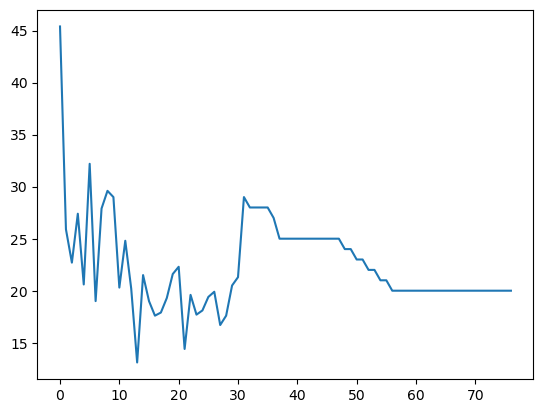

In [78]:
hit_albums["Certified sales (millions)"].plot()

We can also use bar-charts instead of line-charts:

<Axes: ylabel='Artist'>

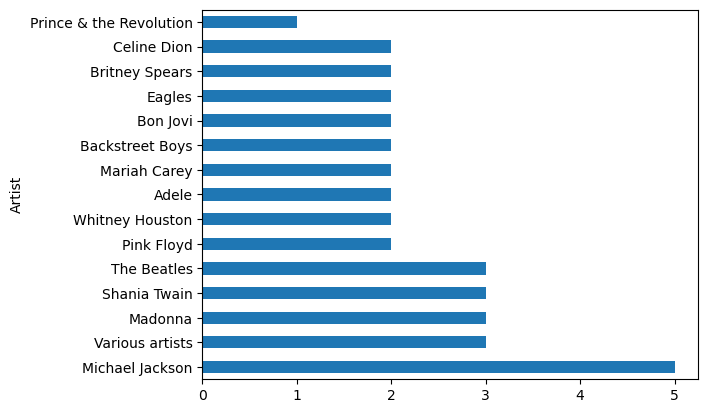

In [79]:
hit_albums.groupby("Artist").count()["Album"].sort_values(ascending=False)[:15].plot(kind="barh")

We can compare certified and claimed sales is a scatterplot:

<Axes: xlabel='Certified sales (millions)', ylabel='Claimed sales (millions)'>

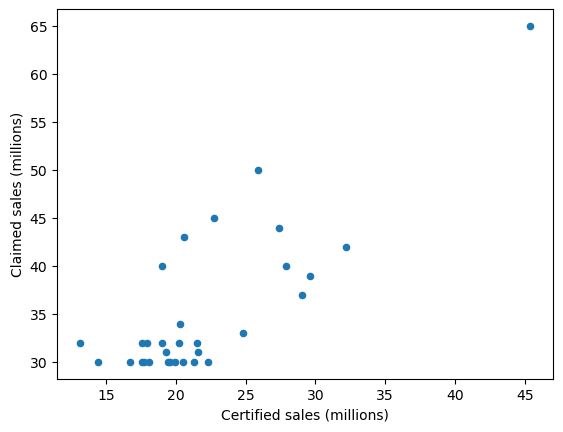

In [80]:
hit_albums.plot.scatter(x="Certified sales (millions)", y="Claimed sales (millions)")

Or a histogram: 

In [81]:
# Here we first cast the column to a numeric type
hit_albums["Certified sales (millions)"] = pd.to_numeric(hit_albums["Certified sales (millions)"])
hit_albums["Claimed sales (millions)"] = pd.to_numeric(hit_albums["Claimed sales (millions)"])
hit_albums.dtypes

Artist                         object
Album                          object
Released                        int64
Genre                          object
Certified sales (millions)    float64
Claimed sales (millions)      float64
dtype: object

<Axes: ylabel='Frequency'>

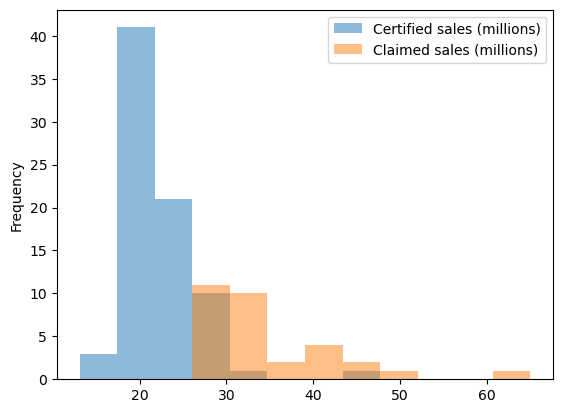

In [82]:
hit_albums[['Certified sales (millions)', 'Claimed sales (millions)']].plot.hist(bins=12, alpha=0.5)

We'll do more sophisticated plotting next! 